In [1]:
import pandas as pd

In [7]:
df_1 = pd.read_excel('dataset.xlsx', header=0, index_col=0)

In [5]:
df_1.head()

,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,6 ContributorsThe Messenger (Live from Las Veg...
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,93 ContributorsCancer Lyrics\nTurn away\nIf yo...
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,129 ContributorsTranslationsРусскийDeutschEspa...
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,109 ContributorsTranslationsEspañolI’m Not Oka...
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,58 ContributorsHold on Till May Lyrics\nShe si...


In [8]:
# create a lambda function that deletes text before first "Lyrics" word
# exclude the word "Lyrics" from the result
delete_text_before_lyrics = lambda x: x[x.find("Lyrics") + len("Lyrics"):] if x.find("Lyrics") != -1 else x

In [9]:
# apply the lambda function to the lyrics column
df_1['lyrics'] = df_1['lyrics'].apply(delete_text_before_lyrics)

> Remove songs without lyric and select only lyrics

In [10]:
sum(df_1['lyrics'] == 'lyrics not available')

198

In [11]:
df_1 = df_1[df_1['lyrics'] != 'lyrics not available']

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 49
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                836 non-null    object 
 1   name              836 non-null    object 
 2   artist            836 non-null    object 
 3   disc              836 non-null    int64  
 4   duration          836 non-null    int64  
 5   episode           836 non-null    bool   
 6   explicit          836 non-null    bool   
 7   popularity        836 non-null    int64  
 8   danceability      836 non-null    float64
 9   acousticness      836 non-null    float64
 10  energy            836 non-null    float64
 11  instrumentalness  836 non-null    float64
 12  liveness          836 non-null    float64
 13  loudness          836 non-null    float64
 14  mode              836 non-null    int64  
 15  speechiness       836 non-null    float64
 16  tempo             836 non-null    float64
 17

In [16]:
import pandas as pd
from transformers import pipeline
from langdetect import detect  # You may need to install the langdetect library

In [20]:


def analyze_sentiment(text, language, max_sequence_length=512):
    if len(text) > max_sequence_length:
        text = text[:max_sequence_length]  # Truncate or preprocess the text to fit the model's maximum sequence length

    model_name = None  # Define model_name variable

    if language == "en":
        model_name = "distilbert-base-uncased"
    elif language == "es":
        model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    elif language == "fr":
        model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

    if model_name is not None:
        classifier = pipeline("sentiment-analysis", model=model_name)
        result = classifier(text)
        return result[0]
    else:
        return None 




# Analyze sentiment for each song and add results as a new column
df_1['Language'] = df_1['lyrics'].apply(detect)  # Detect the language
df_1['Sentiment'] = df_1.apply(lambda row: analyze_sentiment(row['lyrics'], row['Language']), axis=1)




You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'class

In [23]:
df_1.head()

,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,Language,Sentiment
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,...,0.1880,-5.711,1,0.0295,109.001,4,0.187,"When you feel you're alone, cut off from this ...",en,"{'label': 'LABEL_0', 'score': 0.501646876335144}"
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,...,0.2780,-4.310,1,0.0261,74.984,4,0.222,"\nTurn away\nIf you could, get me a drink\nOf ...",en,"{'label': 'LABEL_0', 'score': 0.504169762134552}"
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,...,0.1130,-10.654,1,0.0278,76.426,4,0.118,\nA heart that's full up like a landfill\nA jo...,en,"{'label': 'LABEL_0', 'score': 0.5278946161270142}"
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,...,0.2690,-3.427,1,0.1230,179.722,4,0.255,"\n\nWell, if you wanted honesty\nThat's all yo...",en,"{'label': 'LABEL_0', 'score': 0.552364706993103}"
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,...,0.0735,-3.710,1,0.0525,73.019,4,0.327,"\nShe sits up high, surrounded by the sun\nOne...",en,"{'label': 'LABEL_0', 'score': 0.5366515517234802}"


In [26]:
df_1['label'] = df_1['Sentiment'].apply(lambda x: x['label'] if x is not None else None)
df_1['score'] = df_1['Sentiment'].apply(lambda x: x['score'] if x is not None else None)


In [31]:
df_1.label.value_counts()

LABEL_0    344
LABEL_1    341
1 star      64
5 stars     46
2 stars     17
4 stars      6
3 stars      5
Name: label, dtype: int64

In [32]:
df_1.to_csv('hugging_face_sentiment.csv')

In [34]:
df_1.Language.value_counts()

en    685
es     93
fr     45
so      3
ca      3
it      2
tl      2
pt      2
tr      1
Name: Language, dtype: int64

<AxesSubplot: >

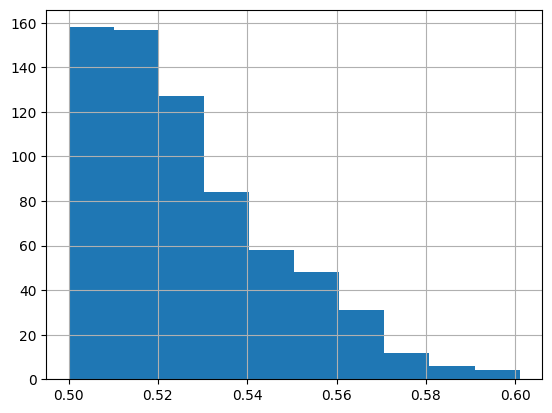

In [38]:
df_1[df_1.Language == 'en'].score.hist()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f065cd9-5144-44fc-bc55-723d64b92321' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>